In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

# How to open and read different files

### The FITS file

In [3]:
# open the file
data = fits.open('/Users/natachaupra/Downloads/manga-8135-1902-LOGCUBE.fits.gz')

In [41]:
# To get the info of all subfiles that is in the fits file of each object

# data.info() 

In [40]:
# To get the information about the object you are using 

# data[0].header

# focus on the RA, Dec, plateifu, mangaid, bunit

<img src = 'Images/TheBread.png' style = "width:400pt"/>

In [11]:
# how to open each subfile. Just copy this code

flux = np.transpose(data['FLUX'].data, axes=(2, 1, 0))
ivar = np.transpose(data['IVAR'].data, axes=(2, 1, 0))
mask = np.transpose(data['MASK'].data, axes=(2, 1, 0))
wave = data['WAVE'].data

In [33]:
# flux = [x][y][wavelength] --> value of flux density at any point (x,y) at a certain wavelength
# x = y
# wavelength = 4563

print('Information below is for this particular object only')
print('length of the x dimension =', len(flux))
print('length of the y dimension =', len(flux[0]))
print('length of the wavelength (depth) dimension =', len(flux[0][0]))

Information below is for this particular object only
length of the x dimension = 34
length of the y dimension = 34
length of the wavelength (depth) dimension = 4563


In [34]:
flux[0][0] # example of flux density array at pixel (0,0) for each wavelength. It is a 1D array, 4563 items long

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [10]:
# Example of how to add arrays element-wise, using numpy array
a = np.array([1,2,3])
b = np.array([4,5,6])
a+b

array([5, 7, 9])

In [12]:
wave # file containing all the observed wavelengths in the observed frame; 4563 items long

array([ 3621.59598486,  3622.42998417,  3623.26417553, ...,
       10349.03843826, 10351.42166679, 10353.80544415])

### The DRP file

In [19]:
drp_data = fits.open('/Users/natachaupra/Desktop/Project/Senior-Project/drpall-v2_4_3.fits')
# drp data containing the information about the object

In [36]:
drp_data.info() #information in drp data

Filename: /Users/natachaupra/Desktop/Project/Senior-Project/drpall-v2_4_3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU    208   11465R x 99C   ['K', '21A', '11A', '11A', '6A', '6A', '6A', '7A', '4A', '14A', '12A', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'K', 'D', 'K', 'D', 'D', '35A', 'K', '11A', 'K', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'K', 'K', 'K', 'D', 'D', 'D', 'D', 'K', 'K', 'K', 'K', '19A', 'K', '19A', 'K', 'K', 'K', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'K', 'K', 'K', '6A', 'K', 'K', 'D', 'D', '7D', '7D', '7D', 'D', 'D', 'D', 'D', '7D', 'D', 'D', '7D', '7D', '7D', '7D', 'D', 'D', 'D', 'D', '7D', '7D']   


In [51]:
#information in the second subfile in drp data. Focus on nsa_z for redshift.

# drp_data[1].header 

In [73]:
# np.where to get the index of the object with the mangaid that we want.
index = np.where(drp_data[1].data['mangaid'] == '1-43214') 
print('index of object with mangaid 1-43214 in drp file =', index[0][0])

# you can also get index using plateifu
plateifu_index = np.where(drp_data[1].data['plateifu'] == '8135-1902')
print('index of object with mangaid 1-43214 in drp file =', plateifu_index[0][0])

# using the index we found, we can call the drp with that index and get the redshift of the object
redshift = drp_data[1].data[index[0][0]]['nsa_z']
print('Redshift of object with mangaid 1-43214 in drp file =', redshift)

index of object with mangaid 1-43214 in drp file = 4571
index of object with mangaid 1-43214 in drp file = 4571
Redshift of object with mangaid 1-43214 in drp file = 0.117997


### The DAP file

In [42]:
df = pd.read_csv('/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/DAP.csv', sep=',')

In [84]:
# If you want to see the whole dataframe, just run this cell. It's very long tho

# pd.set_option("display.max_rows", None)
# df

In [85]:
# To get all the information about the object, just call it using the mangaid
df.loc[df['mangaid'] == '1-43214']

,plate,ifudesign,plateifu,mangaid,drpallindx,mode,daptype,dapdone,objra,objdec,...,specindex_1re_cah1,specindex_1re_cah2,specindex_1re_naisdss,specindex_1re_tio2sdss,specindex_1re_d4000,specindex_1re_dn4000,specindex_1re_tiocvd,sfr_1re,sfr_tot,htmID
30,8135,1902,8135-1902,1-43214,4571,CUBE,HYB10-GAU-MILESHC,True,114.096382,39.438278,...,-0.017145,0.248986,0.425967,0.075008,0.877356,0.896188,0.995518,6.891536,27.41525,16283386537540


In [86]:
# Or call it using plateifu
df.loc[df['plateifu'] == '8135-1902']

,plate,ifudesign,plateifu,mangaid,drpallindx,mode,daptype,dapdone,objra,objdec,...,specindex_1re_cah1,specindex_1re_cah2,specindex_1re_naisdss,specindex_1re_tio2sdss,specindex_1re_d4000,specindex_1re_dn4000,specindex_1re_tiocvd,sfr_1re,sfr_tot,htmID
30,8135,1902,8135-1902,1-43214,4571,CUBE,HYB10-GAU-MILESHC,True,114.096382,39.438278,...,-0.017145,0.248986,0.425967,0.075008,0.877356,0.896188,0.995518,6.891536,27.41525,16283386537540


In [87]:
# The dataframe is 620 columns wide so not everything maybe displayed. You can just call the things you want
# For example, redhsift
df.loc[df['mangaid'] == '1-43214']['nsa_z']

30    0.117997
Name: nsa_z, dtype: float64

# How to plot stuff

### Central Spectrum

You can just copy the code below :)

17 17


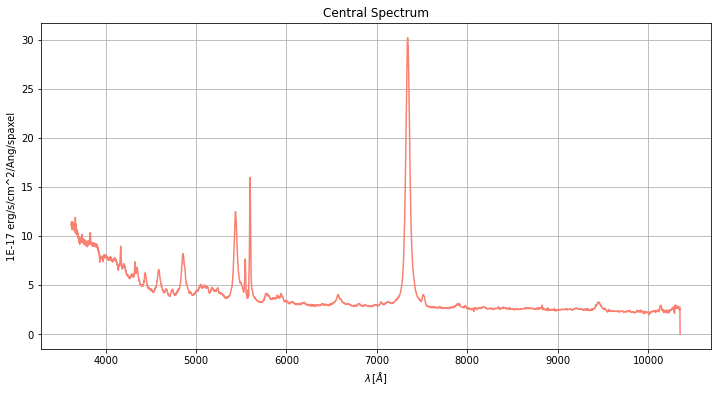

In [99]:
x_center = int(flux_header['CRPIX1']) - 1
y_center = int(flux_header['CRPIX2']) - 1

# You can see that it is (17,17) because this object is 34 x 34 pixels, so center pixel is (17,17)
print(x_center, y_center) 

plt.figure(figsize = (12, 6)) # Changing the figure size of the plot # OPTIONAL
plt.grid() # Add grid to the plot # OPTIONAL

plt.plot(wave, flux[x_center, y_center], color = 'salmon')
# You can change the color of the plot if you want. 
# Choose here : https://matplotlib.org/stable/gallery/color/named_colors.html 

plt.xlabel('$\lambda \, [\AA]$') # Put label for the x-axis

flux_header = data['FLUX'].header # We call this one just so we can get the unit of flux density in the next line
plt.ylabel(flux_header['BUNIT']) # Put label for the y-axis 

plt.title('Central Spectrum') # Put title

plt.show()

### The 2D Image

$$ 1+z = \frac{\lambda_{Obs}}{\lambda_{Rest}}$$

In [105]:
do_not_use = (mask & 2**10) != 0 # This is the mask criteria, from the MASK array in the FITS file of the object
flux_m = np.ma.array(flux, mask=do_not_use) # Masking it 

redshift = 0.117997 # redshift depends on the object. You can just call the redshift from above too, that you 
# found from the DRP / DAP file

# This is the H-alpha range (H-alpha wavelength = 6563 ang)
ind_wave = np.where((wave / (1 + redshift) > 6550) & (wave / (1 + redshift) < 6680))[0]
halpha = flux_m[:, :, ind_wave].sum(axis=2)
im = halpha.T

# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
dy = flux_header['CD2_2'] * 3600.  # deg to arcsec

# extent here gives you the angle subtended by the object in the sky in arcsec
x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy

# The structure is [x_min, x_max, y_min, y_max]
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]
print('extent =',extent)

# dim gives you the number of pixels in x and y dimensions of the object
dim = [0, len(flux), 0, len(flux)]
print('pixels =',dim)

extent = [-8.5000068, 8.5000068, -8.5000068, 8.5000068]
pixels = [0, 34, 0, 34]


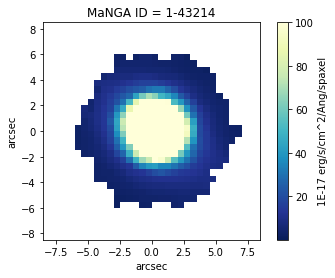

In [117]:
# You can change the size if you want. Use figsize like above
# Change the color of the image (cmap) : https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
plt.imshow(im, extent=extent, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
plt.colorbar(label=flux_header['BUNIT'])
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.title('MaNGA ID = 1-43214')
plt.show()

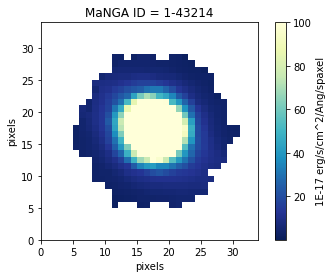

In [118]:
plt.imshow(im, extent=dim, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
plt.colorbar(label=flux_header['BUNIT'])
plt.xlabel('pixels')
plt.ylabel('pixels')
plt.title('MaNGA ID = 1-43214')
plt.show()

### The Full Spectrum

In [108]:
# sum flux density values element wise to get total flux density

n = len(flux) # to get the x and the y dimension. They are equal so I can use the same n for both times
sumflux = np.zeros(4563) # make empty array to collect the value. Sumflux is an array of 4563 zeros. I will add 
# the flux density into it
    
for i in range(n): # double for-loop to loop the x and the y direction 
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j] # masking the bad pixels. I explained this part last time already
        # but if you are still confused lmk
        
        # add the masked flux density element-wise to the sumflux array. 
        sumflux = np.add(sumflux, flux[i,j])
        

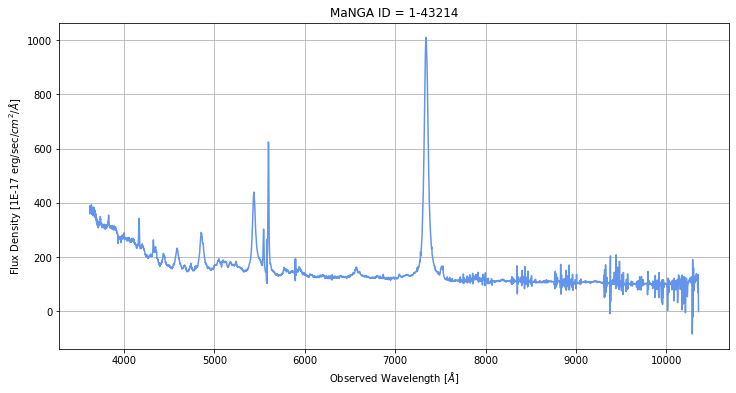

In [111]:
plt.figure(figsize = (12,6))
plt.grid()

# Setting the limit for x and y axis to sort of zoom the object. You can try playing with this 
# plt.xlim(7000,8000)
# plt.ylim(0, 1050)

plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = 1-43214')

plt.plot(wave, sumflux, color = 'cornflowerblue')

# If you wanna save the figure, you can use this format
# plt.savefig('path_and_name_of_file_(your_choice)', bbox_inches = 'tight')

If you want to plot the flux density spectrum against the rest frame wavelength, divide the wave file by (1+z)

In [114]:
rest_wave = wave / (1+redshift)

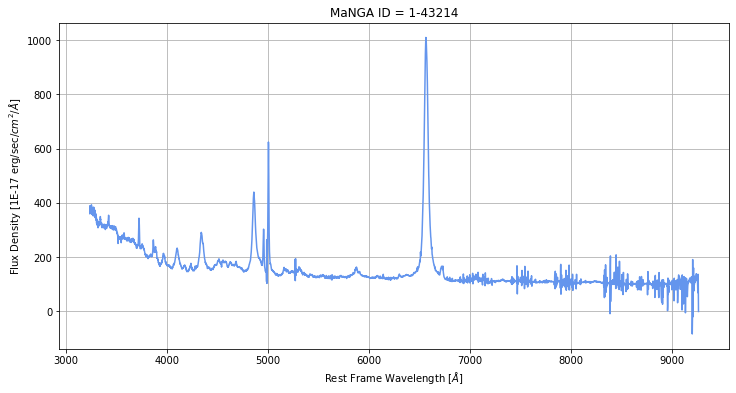

In [116]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = 1-43214')
plt.plot(rest_wave, sumflux, color = 'cornflowerblue')
